# Image Generation using Variational AutoEncoders

The goal of Autoencoders was to generate latent vectors which are easily decodable back to the original image. But this can cause the latent space to become disjoint and non-continous.

Variational Autoencoders were introduced to remedy this. Variational Autoencoders are trained to learn the probability distribution that models the input data. In varional autoencoders, the inputs are mapped to a probability distribuion over latent vectors. Typically, this probability distribution is set to standard normal distribution. So, there are two targets in VAEs: one to minimize the reconstruction loss and two to minimize the KL divergence between the Probilitistic encoder and standard normal distribution.


!["Variational Autoencoder Architecture"](https://blog.bayeslabs.co/assets/img/vae-gaussian.png)

<p align = "center">
Fig.1 - Variational Autoencoder Architecture
(<a href=https://blog.bayeslabs.co/2019/06/04/All-you-need-to-know-about-Vae">
source
</a>)
</p>

In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
from torchsummary import summary
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
from tqdm import tqdm
import numpy as np

In [ ]:
EPOCHS = 20
LEARNING_RATE = 1e-4
BATCH_SIZE = 64
Z = 32
KLD_WEIGHT = 0.0012

In [ ]:
# We will be using the mnist digit data.
mnist_dataset = datasets.MNIST(root="minist_data/", download=True, transform=ToTensor())

In [ ]:
# Initializing pytorch dataloader
train_dataloader = DataLoader(mnist_dataset, batch_size=BATCH_SIZE, shuffle=True)

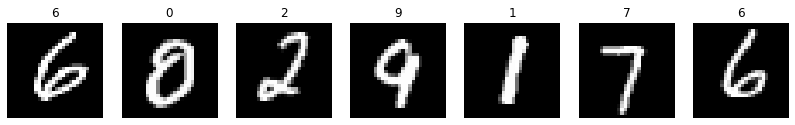

In [ ]:
# Visualizing some sample images
figure = plt.figure(figsize=(14, 14))
cols, rows = 7, 1
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(mnist_dataset), size=(1,)).item()
    img, label = mnist_dataset[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(label)
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

Here, we will define a model for a Variational Autoencoder. It is mostly similar to Autoencoders with a few differences. Instead of the encoder outputing a deterministic latent space representation like in autoencoders, the encoder will now output a mean and log variance vector. The latent space representation will then be sampled using them. We output log variance instead of just variance because the varaince always has to be postive.

The docoder is same as in autoencoders.

For sampling the latent space representation, we use a reparameterization trick so that it is possible to backpropagate. The basic idea is given below in the Fig 2.

!["Reparameteriztion Trick"](https://blog.bayeslabs.co/assets/img/vae_part_1_1.png)

<p align = "center">
Fig.2 - Reparameteriztion Trick
(<a href=https://blog.bayeslabs.co/2019/06/04/All-you-need-to-know-about-Vae">
source
</a>)
</p>



The loss funtion of Variational Autoencoders is called Evidence Lower Bound (ELBO) as it bounds the likelihood of the data which we want to maximise and it consists of two terms.
$$ L = ReconstructionLoss + KLDivergence $$
Reconstruction Loss is simply a measure of the likelihood of the reconstructed data output at the decoder. Typically, it is the mean squared error between input and output.

KL Divergence here acts as a regulaizer term becuase it is constraint on the form of tour approximate posterior. Typically, it is assumed as standard normal distribution.

$$KL(N(\mu, \sigma), N(0, 1)) = -0.5 * (1 + \log \sigma^2 - \sigma^2 - \mu^2)$$

Complete derivation of the loss for VAEs can be studied [here](https://deepai.org/publication/tutorial-deriving-the-standard-variational-autoencoder-vae-loss-function)

Another thing we need to take care of is the weight of each term in the loss. If the weight of KL Divergence is too high, it will then take focus off reconstruction and we will get bad reconstruction and if it is too low, the approximate posterior distribution will become non-continous.

### Generation through Variational AutoEncoders

### Discussion

With Variational AutoEncoders, we sacrificed a little in reconstruction but in the end we got some decent generations from completely random inputs. But as it can be seen, they are blurry. This is one of the shortcommings of VAEs, that they produce blurry images.